In [23]:
from torch import tensor

cam = {
    "FoVx": tensor(0.8576, device="cuda:0", dtype=torch.float64),
    "FoVy": tensor(0.8576, device="cuda:0", dtype=torch.float64),
    "image_width": tensor(512, device="cuda:0"),
    "image_height": tensor(512, device="cuda:0"),
    "world_view_transform": tensor(
        [
            [7.4314e-01, 3.3457e-01, -5.7948e-01, 0.0000e00],
            [-6.6913e-01, 3.7157e-01, -6.4358e-01, 0.0000e00],
            [4.9297e-09, -8.6603e-01, -5.0000e-01, 0.0000e00],
            [7.9767e-09, 1.6218e-08, 1.2000e00, 1.0000e00],
        ],
        device="cuda:0",
    ),
    "projection_matrix": tensor(
        [
            [2.1875, 0.0000, 0.0000, 0.0000],
            [0.0000, 2.1875, 0.0000, 0.0000],
            [0.0000, 0.0000, 1.0001, 1.0000],
            [0.0000, 0.0000, -0.0100, 0.0000],
        ],
        device="cuda:0",
    ),
    "full_proj_transform": tensor(
        [
            [1.6256e00, 7.3186e-01, -5.7954e-01, -5.7948e-01],
            [-1.4637e00, 8.1281e-01, -6.4365e-01, -6.4358e-01],
            [1.0784e-08, -1.8944e00, -5.0005e-01, -5.0000e-01],
            [1.7449e-08, 3.5477e-08, 1.1901e00, 1.2000e00],
        ],
        device="cuda:0",
    ),
    "camera_center": tensor([0.6954, 0.7723, 0.6000], device="cuda:0"),
    # "camera_center": tensor([3., 3., 3.], device="cuda:0"),
    "c2w": tensor(
        [
            [0.7431, 0.3346, -0.5795, 0.6954],
            [-0.6691, 0.3716, -0.6436, 0.7723],
            [0.0000, -0.8660, -0.5000, 0.6000],
            [0.0000, 0.0000, 0.0000, 1.0000],
        ],
        device="cuda:0",
    ),
}

## GaussianCube 3D OT Render 

In [6]:
import torch
from gaussian_renderer import render
from utils.script_util import init_volume_grid


gc_path = "/Data/GaussianCube_data/output_gaussiancube/volume_act/6f0ad1fb7917fd9b50577cf04f3bf74a.pt"
normal_sample = torch.load(gc_path).permute(3, 0, 1, 2).to(torch.float).to("cuda:0")
std_volume = (
    torch.tensor(init_volume_grid(bound=0.45, num_pts_each_axis=32))
    .to(torch.float32)
    .to("cuda:0")
    .contiguous()
)
bg_color = torch.tensor([1.0, 1.0, 1.0], device="cuda:0")
active_sh_degree = 0

images = []
n_steps = 100

for i in range(n_steps):
    sample = normal_sample.clone()
    sample[:3, :, :, :] = sample[:3, :, :, :] - i / (n_steps-1) * std_volume.reshape(3, 32, 32, 32)
    res = render(cam, sample, std_volume, bg_color, active_sh_degree)
    output_image = res["render"].clamp(0.0, 1.0).permute(1, 2, 0).cpu().detach().numpy()
    images.append(output_image)

/tmp/ipykernel_677322/823535673.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  normal_sample = torch.load(gc_path).permute(3, 0, 1, 2).to(torch.float).to("cuda:0")


In [7]:
import imageio
import os

imageio.mimwrite(os.path.join("presentation_images", "ot_struct.mp4"), images, fps=30)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

## Denoising process

['intermediate_0.pt', 'intermediate_30.pt', 'intermediate_60.pt', 'intermediate_90.pt', 'intermediate_120.pt', 'intermediate_150.pt', 'intermediate_180.pt', 'intermediate_210.pt', 'intermediate_240.pt', 'intermediate_270.pt', 'intermediate_300.pt']
torch.Size([14, 32, 32, 32])


/tmp/ipykernel_677322/1265733383.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample = torch.load(f"presentation_images/{gc}")


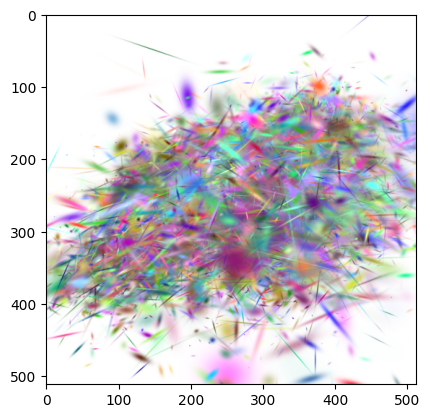

torch.Size([14, 32, 32, 32])


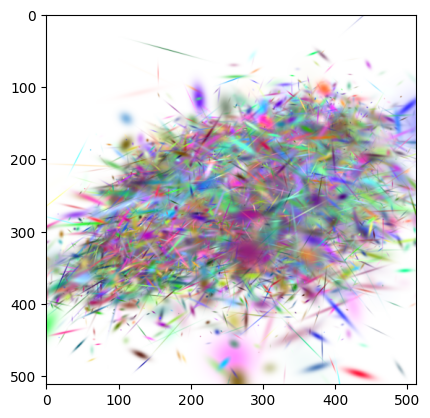

torch.Size([14, 32, 32, 32])


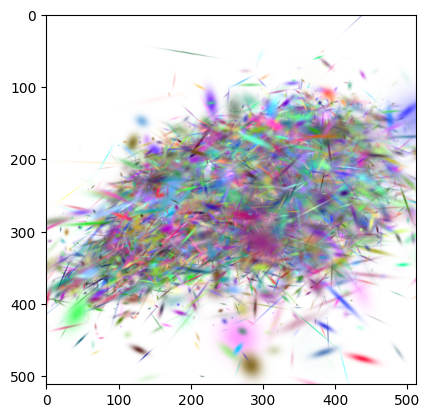

torch.Size([14, 32, 32, 32])


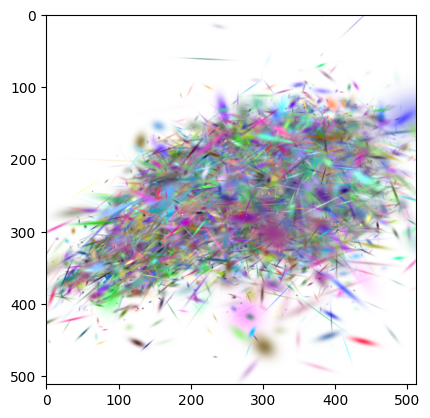

torch.Size([14, 32, 32, 32])


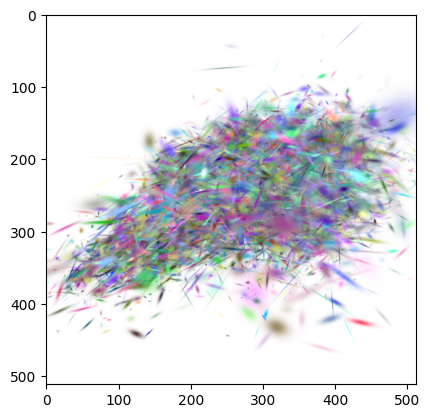

torch.Size([14, 32, 32, 32])


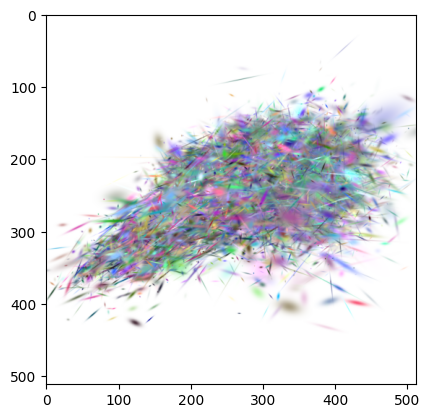

torch.Size([14, 32, 32, 32])


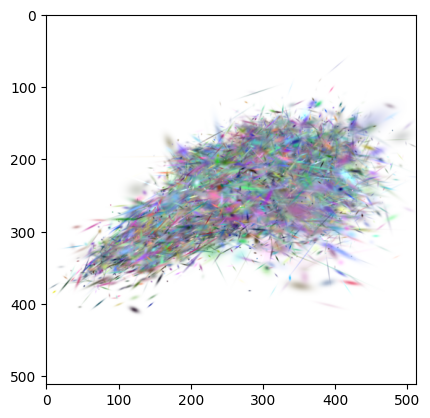

torch.Size([14, 32, 32, 32])


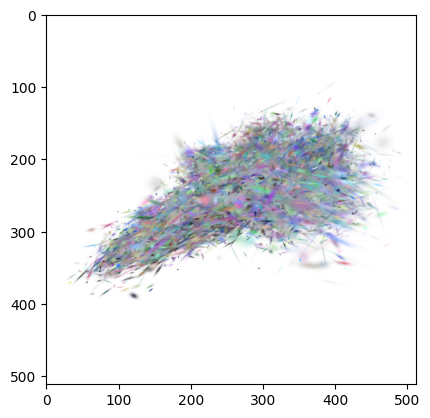

torch.Size([14, 32, 32, 32])


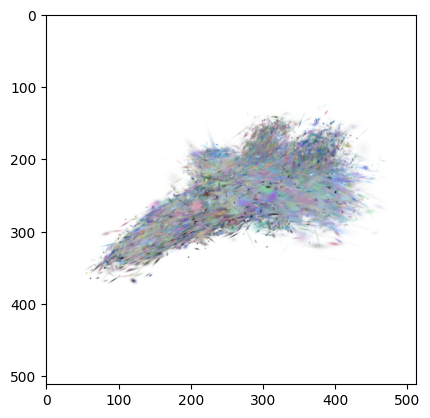

torch.Size([14, 32, 32, 32])


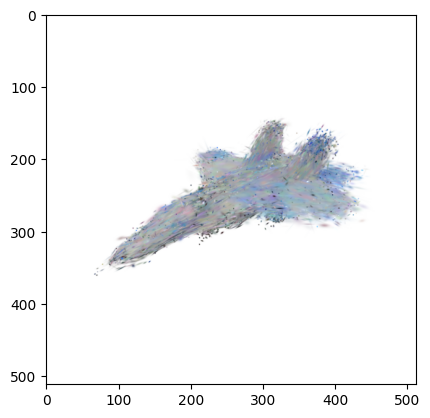

torch.Size([14, 32, 32, 32])


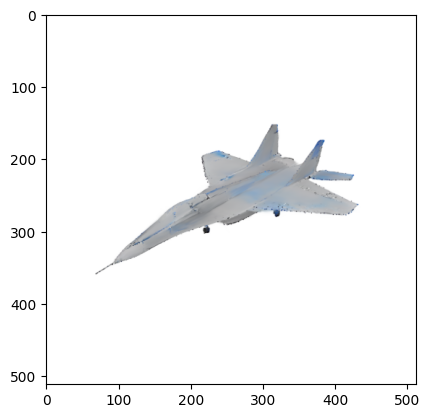

In [18]:
import torch
from gaussian_renderer import render
from utils.script_util import init_volume_grid
import matplotlib.pyplot as plt

std_volume = (
    torch.tensor(init_volume_grid(bound=0.45, num_pts_each_axis=32))
    .to(torch.float32)
    .to("cuda:0")
    .contiguous()
)
bg_color = torch.tensor([1.0, 1.0, 1.0], device="cuda:0")
active_sh_degree = 0

gc_list = os.listdir("presentation_images")
gc_list = [gc for gc in gc_list if gc.endswith(".pt")]

print(gc_list)

for i, gc in enumerate(gc_list):
    sample = torch.load(f"presentation_images/{gc}")
    sample = sample.squeeze(0).to(torch.float).to("cuda:0")
    print(sample.shape)
    res = render(cam, sample, std_volume, bg_color, active_sh_degree)
    output_image = res["render"].clamp(0.0, 1.0).permute(1, 2, 0).cpu().detach().numpy()
    plt.imsave(f"presentation_images/denoising_{i}.png", output_image)
    plt.imshow(output_image)
    plt.show()
    # imageio.imwrite(f"presentation_images/denoising_{i}.png", output_image)

## Samples

In [35]:
import cv2

samples_path_dir = "/Data/GaussianCube_data/output/shapenet_diffusion_training"
samples_idx = ["000000", "000003", "000008", "000017", "000039", "000042", "000049", "000060", "000083", "000028", "000098"]
videos_path = [f"{samples_path_dir}/videos/rank_00_render_{i}.pt" for i in samples_idx]

# for i, video_path in enumerate(videos_path):
#     cap = cv2.VideoCapture(video_path)

#     if not cap.isOpened():
#         print("Error: Could not open video.")
#         exit()

#     frame_number = 6
#     cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

#     ret, frame = cap.read()

#     if ret:
#         output_image_path = f"./presentation_images/sample_{i}.png"
#         cv2.imwrite(output_image_path, frame)
#         print(f"7th frame saved as {output_image_path}")
#     else:
#         print("Error: Could not read the frame.")

#     # Release the video capture object
#     cap.release()


# for i, sample_path in enumerate(samples_path):
#     sample = torch.load(sample_path)
#     print(sample.shape)
#     sample = sample.permute(3, 0, 1, 2).to(torch.float).to("cuda:0")
#     res = render(cam, sample, std_volume, bg_color, active_sh_degree)
#     output_image = res["render"].clamp(0.0, 1.0).permute(1, 2, 0).cpu().detach().numpy()
#     plt.imsave(f"presentation_images/sample_{i}.png", output_image)
#     plt.imshow(output_image)
#     plt.show()

Error: Could not open video.
Error: Could not read the frame.
Error: Could not open video.
Error: Could not read the frame.
Error: Could not open video.
Error: Could not read the frame.
Error: Could not open video.
Error: Could not read the frame.
Error: Could not open video.
Error: Could not read the frame.
Error: Could not open video.
Error: Could not read the frame.
Error: Could not open video.
Error: Could not read the frame.
Error: Could not open video.
Error: Could not read the frame.
Error: Could not open video.
Error: Could not read the frame.
Error: Could not open video.
Error: Could not read the frame.
Error: Could not open video.
Error: Could not read the frame.


: 